In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math as mt
import os
from scipy import stats as st
import datetime as dt
pd.set_option('display.max_columns', None)

## CARGA Y UNION DE LOS DATAFRAMES CON DATOS DE LOS EVENTOS DE MASTITIS

In [2]:
# creacion de variables con las rutas de ubicacion de los archivos y documentos para cambiar de directorio en la medida sea requerido
ruta_base = '/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/'
folder = 'datos brutos iniciales tesis/'
datos_mastitis = 'datos mastitis/target'

In [3]:
# modificacion de la ruta de acceso al directorio de trabajo actual para la obtencion de los archivos brutos
nueva_ruta = ruta_base+folder+datos_mastitis
nueva_ruta

'/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/datos brutos iniciales tesis/datos mastitis/target'

In [4]:
os.chdir(nueva_ruta)
os.listdir()

['.DS_Store',
 'Mastiti 2024.xls',
 'Mastiti 2022.xls',
 'Mastiti 2023.xls',
 'Mastiti 2021.xls']

In [5]:
# creacion de la lista con los archivos encontrados en el directorio actual
list_files_mast = os.listdir()
print("Cantidad de archivos:",len(list_files_mast))
list_files_mast

Cantidad de archivos: 5


['.DS_Store',
 'Mastiti 2024.xls',
 'Mastiti 2022.xls',
 'Mastiti 2023.xls',
 'Mastiti 2021.xls']

In [6]:
# creacion de la lista con los archivos de formato excel en el directorio actual
list_files_mast_xl = [file for file in list_files_mast if "xl" in file]
print("Cantidad de archivos excel:",len(list_files_mast_xl))
list_files_mast_xl

Cantidad de archivos excel: 4


['Mastiti 2024.xls',
 'Mastiti 2022.xls',
 'Mastiti 2023.xls',
 'Mastiti 2021.xls']

In [7]:
dfs_mastitis = []

# Iterar sobre la lista con los DataFrames para unirlos en 1
for file in list_files_mast_xl:
    
    df = pd.read_excel(f'{file}')
    print("name file:", file,"==> forma del df:", df.shape)
    
    df["name_file"] = file
    
    print("forma del df nuevo:", df.shape)
    print("")
    # Agregar los dfs la lista
    dfs_mastitis.append(df)

# Concatenar todos los dfs en uno solo
dfs_mastitis = pd.concat(dfs_mastitis, ignore_index=True)

del(df)

name file: Mastiti 2024.xls ==> forma del df: (114, 13)
forma del df nuevo: (114, 14)

name file: Mastiti 2022.xls ==> forma del df: (1258, 13)
forma del df nuevo: (1258, 14)

name file: Mastiti 2023.xls ==> forma del df: (729, 13)
forma del df nuevo: (729, 14)

name file: Mastiti 2021.xls ==> forma del df: (1210, 13)
forma del df nuevo: (1210, 14)



####  Carga del archivo extra de Eventos del software

In [8]:
#Carga del df con los datos de eventos de enfermedades
df_eventos = pd.read_csv("/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/datos brutos iniciales tesis/datos mastitis/datos_mastitis.csv", sep=";", decimal=",", date_format="%d/%m/%Y")

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_56274/720107956.py:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eventos = pd.read_csv("/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/datos brutos iniciales tesis/datos mastitis/datos_mastitis.csv", sep=";", decimal=",", date_format="%d/%m/%Y")


In [9]:
df_eventos.shape

(3277901, 17)

In [10]:
df_eventos["code_date"] = df_eventos["N° de la Vaca"].astype(str)+["-"]+df_eventos["Fecha"].astype(str)
df_eventos["code_date"] = df_eventos["code_date"].str.strip()

df_eventos["code_date_eve"] = df_eventos["N° de la Vaca"].astype(str)+["-"]+df_eventos["Fecha"].astype(str)+["-"]+df_eventos["Turno"].astype(str)+["-"]+df_eventos["Nº de Lactancia"].astype(str)

In [11]:
#Cantidad de codigos unicos de eventos
print(df_eventos.shape[0])
len(df_eventos["code_date_eve"].unique())

3277901


1639636

In [12]:
#Eliminacion de los codigos de fecha duplicados
df_eventos.drop_duplicates("code_date", inplace=True)

### Modificacion del conjunto de datos de mastitis reales

In [13]:
dfs_mastitis

,FECHA,DIIO,ID vaca,TIPO DE EVENTO,ENFERMEDAD,OBSERVACIONES,RESPONSABLE,TRATAMIENTO,DOSIS (ML),DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO CARNE,PERÍODO DE RESGUARDO LECHE,MASTITIS,name_file
0,2024-01-03,152000016323326,16323326,Mastitis,NaN,NaN,NaN,Mastiplan LC,8.0,2.0,NaN,6.0,Posterior derecho,Mastiti 2024.xls
1,2024-01-03,152000016323326,16323326,Mastitis,NaN,NaN,NaN,"Cobactan 2,5%",20.0,3.0,NaN,1.0,Posterior derecho,Mastiti 2024.xls
2,2024-01-03,152000016323326,16323326,Mastitis,NaN,NaN,NaN,Mobexvet,1.5,1.0,NaN,5.0,Posterior derecho,Mastiti 2024.xls
3,2024-01-03,152000019444420,19444420,Mastitis,NaN,NaN,NaN,Amplifort,3.0,2.0,NaN,3.0,Anterior derecho,Mastiti 2024.xls
4,2024-01-03,152000019444420,19444420,Mastitis,NaN,NaN,NaN,"Cobactan 2,5%",20.0,3.0,NaN,1.0,Anterior derecho,Mastiti 2024.xls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,2021-12-31,152000006282374,6282374,Mastitis,NaN,Cuarto PD,Quilanto,"Cobactan 2,5%",20.0,3.0,NaN,NaN,NaN,Mastiti 2021.xls
3307,2021-12-31,152000006282374,6282374,Mastitis,NaN,Cuarto PD,Quilanto,Mobexvet,5.0,1.0,NaN,NaN,NaN,Mastiti 2021.xls
3308,2021-12-31,152000006282431,6282431,Mastitis,NaN,Cuarto PI,Quilanto,Pirsue,3.0,3.0,NaN,NaN,NaN,Mastiti 2021.xls
3309,2021-12-31,152000006282431,6282431,Mastitis,NaN,Cuarto PI,Quilanto,Cobactan LC,3.0,2.0,NaN,NaN,NaN,Mastiti 2021.xls


In [14]:
#Creacion del codigo de fecha para el df de mastitis
dfs_mastitis["code_date"] = dfs_mastitis["ID vaca"].astype(str)+["-"]+dfs_mastitis["FECHA"].astype(str)
dfs_mastitis["code_date"] = dfs_mastitis["code_date"].str.strip()

In [15]:
print("Forma final del df:", dfs_mastitis.shape)
(dfs_mastitis.isna().sum() / dfs_mastitis.shape[0]).sort_values()

Forma final del df: (3311, 15)


FECHA                         0.000000
DIIO                          0.000000
ID vaca                       0.000000
TIPO DE EVENTO                0.000000
name_file                     0.000000
code_date                     0.000000
TRATAMIENTO                   0.059197
DOSIS (ML)                    0.059197
DIAS DE TRATAMIENTO           0.059197
RESPONSABLE                   0.257928
OBSERVACIONES                 0.521897
MASTITIS                      0.537300
PERÍODO DE RESGUARDO LECHE    0.537602
ENFERMEDAD                    1.000000
PERÍODO DE RESGUARDO CARNE    1.000000
dtype: float64

In [16]:
print(len(dfs_mastitis["code_date"].unique()), ": Q de registros unicos")

print(dfs_mastitis["PERÍODO DE RESGUARDO LECHE"].sort_values().unique(), "Periodo de resguardo leche")

print(dfs_mastitis[dfs_mastitis["PERÍODO DE RESGUARDO LECHE"].isna()].shape[0], ": Q de registros Nan en periodo de resguardo leche")

print(dfs_mastitis[dfs_mastitis["PERÍODO DE RESGUARDO LECHE"]==0].shape[0], ": Q de registros = 0 en periodo de resguardo leche")

1222 : Q de registros unicos
[ 0.  1.  2.  3.  4.  5.  6. nan] Periodo de resguardo leche
1780 : Q de registros Nan en periodo de resguardo leche
239 : Q de registros = 0 en periodo de resguardo leche


In [17]:
#Se ordena el dataframe para que al momento de eliminar los duplicados se quede con el registro que tiene el periodo de resguardo leche mayor
#Se ordena por periodo de resguardo leche, dias de tratamiento y dosis
#Este df contiene 3 registros para el mismo día para cada vaca, ya que se registra tambien los demas medicamentos que se le aplican a la vaca

dfs_mastitis.sort_values(["PERÍODO DE RESGUARDO LECHE","DIAS DE TRATAMIENTO","DOSIS (ML)"], ascending=[False, False,False], inplace=True)

In [18]:
dfs_mastitis.drop_duplicates("code_date", keep="first", inplace=True)
print(dfs_mastitis.shape)
dfs_mastitis

(1222, 15)


,FECHA,DIIO,ID vaca,TIPO DE EVENTO,ENFERMEDAD,OBSERVACIONES,RESPONSABLE,TRATAMIENTO,DOSIS (ML),DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO CARNE,PERÍODO DE RESGUARDO LECHE,MASTITIS,name_file,code_date
0,2024-01-03,152000016323326,16323326,Mastitis,NaN,NaN,NaN,Mastiplan LC,8.0,2.0,NaN,6.0,Posterior derecho,Mastiti 2024.xls,16323326-2024-01-03
9,2024-02-10,152000016323334,16323334,Mastitis,NaN,NaN,NaN,Mastiplan LC,8.0,2.0,NaN,6.0,Posterior izquierdo,Mastiti 2024.xls,16323334-2024-02-10
898,2022-09-09,152000006281641,6281641,Mastitis,NaN,NaN,Quilanto,Mastiplan LC,8.0,2.0,NaN,6.0,Posterior derecho,Mastiti 2022.xls,6281641-2022-09-09
907,2022-11-17,152000011472850,11472850,Mastitis,NaN,NaN,Quilanto,Mastiplan LC,8.0,2.0,NaN,6.0,Anterior derecho,Mastiti 2022.xls,11472850-2022-11-17
919,2022-11-17,152000006283028,6283028,Mastitis,NaN,NaN,Quilanto,Mastiplan LC,8.0,2.0,NaN,6.0,Posterior izquierdo,Mastiti 2022.xls,6283028-2022-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,2023-12-24,3317,16323317,Mastitis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mastiti 2023.xls,16323317-2023-12-24
2098,2023-12-24,4049,19444049,Mastitis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mastiti 2023.xls,19444049-2023-12-24
2099,2023-12-24,2350,6282350,Mastitis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mastiti 2023.xls,6282350-2023-12-24
2100,2023-12-27,4207,19444207,Mastitis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mastiti 2023.xls,19444207-2023-12-27


### Union del df con datos de mastitis y el df con eventos activos en el sistema

In [19]:
cols_keys = ['TIPO DE EVENTO',  'OBSERVACIONES','TRATAMIENTO', 'DOSIS (ML)', 'DIAS DE TRATAMIENTO', 'PERÍODO DE RESGUARDO LECHE', 'MASTITIS', 'code_date']

In [20]:
df_eventos["Turno"].value_counts()

Turno
Manana    819818
Name: count, dtype: int64

In [21]:
#Union de los df eventos con el df mastitis
print(df_eventos.shape)
datos_mastitis = df_eventos.merge(dfs_mastitis[cols_keys], on= "code_date", how="left")
datos_mastitis.shape

(819818, 19)


(819818, 26)

In [22]:
datos_mastitis["TIPO DE EVENTO"].value_counts()

TIPO DE EVENTO
Mastitis    790
Name: count, dtype: int64

In [23]:
datos_mastitis_notna = datos_mastitis[datos_mastitis["TIPO DE EVENTO"].notna()]
datos_mastitis_notna.shape

(790, 26)

In [24]:
datos_mastitis[datos_mastitis["TIPO DE EVENTO"].notna()]["Turno"].value_counts()

Turno
Manana    790
Name: count, dtype: int64

In [25]:
print(datos_mastitis_notna.shape[0] - datos_mastitis_notna[["TIPO DE EVENTO","Eventos Activos"]].value_counts().sum(), ": Q de registros Nans")
print(datos_mastitis_notna[["TIPO DE EVENTO","Eventos Activos"]].value_counts().sum(), ": Q de registros No Nans")
print("")
print("Tipo de eventos presentes el día de ocurrencia de la mastitis:")
datos_mastitis_notna[["TIPO DE EVENTO","Eventos Activos"]].value_counts()

530 : Q de registros Nans
260 : Q de registros No Nans

Tipo de eventos presentes el día de ocurrencia de la mastitis:


TIPO DE EVENTO  Eventos Activos                                                              
Mastitis        Salud del sistema                                                                148
                Ordeñada fuera de su grupo                                                        50
                Celo del Sistema                                                                  22
                Ordeñada fuera de su grupo; Salud del sistema                                      9
                Estrés                                                                             6
                Estrés; Salud del sistema                                                          5
                Salud del sistema; Celo del Sistema                                                3
                Celo del Sistema; Salud del sistema                                                2
                Estrés; Ordeñada fuera de su grupo                                                

In [26]:
datos_mastitis_notna["code_eve"] = datos_mastitis_notna["N° de la Vaca"].astype(str)+["-"]+datos_mastitis_notna["Nº de Lactancia"].astype(str)+["-"]+datos_mastitis_notna["Fecha"].astype(str)+["-"]+datos_mastitis_notna["Turno"]
datos_mastitis_notna["code_eve"]

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_56274/2771902582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_mastitis_notna["code_eve"] = datos_mastitis_notna["N° de la Vaca"].astype(str)+["-"]+datos_mastitis_notna["Nº de Lactancia"].astype(str)+["-"]+datos_mastitis_notna["Fecha"].astype(str)+["-"]+datos_mastitis_notna["Turno"]


3295       6282548-3-2022-02-25-Manana
3984       6282178-4-2022-01-25-Manana
6100       6281649-4-2022-03-12-Manana
6107       6281649-4-2022-03-19-Manana
8013       6281635-4-2022-01-04-Manana
                      ...             
815228    19444054-1-2023-06-16-Manana
815425     6282739-3-2023-04-01-Manana
817364    16097866-2-2023-04-29-Manana
817982    16097856-2-2023-04-10-Manana
818816    18198251-2-2023-04-25-Manana
Name: code_eve, Length: 790, dtype: object

In [27]:
# Cantidad de eventos de mastitis unicos (con fecha)
#Esto de 1200 registros que habian en el df de mastitis
len(datos_mastitis_notna["code_eve"].unique())

790

In [28]:
#Visualizacion de la cantidad de eventos de mastitis por vaca en el df mastitis
dfs_mastitis["ID vaca"].value_counts()

ID vaca
6282165     10
16097863     8
6282323      8
16323334     7
6282574      7
            ..
19444065     1
19444445     1
16323682     1
16323604     1
19444207     1
Name: count, Length: 607, dtype: int64

## CARGA DE LOS ARCHIVOS CON DATOS DIARIOS (TEMPORALIDAD CONTINUA)

In [29]:
# creacion de variables con las rutas de ubicacion de los archivos y documentos para cambiar de directorio en la medida sea requerido
folder = 'datos brutos iniciales tesis/'
datos_diarios = 'datos diarios'

In [30]:
# modificacion de la ruta de acceso al directorio de trabajo actual para la obtencion de los archivos brutos
nueva_ruta = ruta_base+folder+datos_diarios
nueva_ruta
os.chdir(nueva_ruta)

In [31]:
# creacion de la lista con los archivos encontrados en el directorio actual
list_files_diarios = os.listdir()
print("Cantidad de archivos:",len(list_files_diarios))
list_files_diarios

Cantidad de archivos: 19


['1er_trim_2022.xlsx',
 '.DS_Store',
 'dfs_diarios.csv',
 '1er_trim_2023.xlsx',
 '1er_trim_2024.xlsx',
 'Copia de 1er_trim_2024.csv',
 '2do_trim_2023.xlsx',
 'sep_oct_2023.xlsx',
 '2do_trim_2022.xlsx',
 'sep_oct_2022.xlsx',
 '3er_trim_2021.xlsx',
 '2do_trim_2021.xlsx',
 'jul_ago_2023.xlsx',
 '4to_trim_2021.xlsx',
 'nov_dic_2022.xlsx',
 '1er_trim_2021.xlsx',
 'nov_dic_2023.xlsx',
 '4to_trim_2020.xlsx',
 'julio_agos_2022.xlsx']

In [32]:
# Observacion de la cantidad de archivos y cuales tienen exclusivamente formato excel
print("N° de archivos en la carpeta:",len(list_files_diarios))
print("N° de archivos del formato:",len([file for file in list_files_diarios if "csv" in file]))

N° de archivos en la carpeta: 19
N° de archivos del formato: 2


In [33]:
# creacion de la lista con los archivos de formato excel en el directorio actual
list_files_diarios = [file for file in list_files_diarios if "csv" in file]
print("Cantidad de archivos del formato:",len(list_files_diarios))
list_files_diarios

Cantidad de archivos del formato: 2


['dfs_diarios.csv', 'Copia de 1er_trim_2024.csv']

In [34]:
dfs_diarios = pd.read_csv('dfs_diarios.csv', sep=";", decimal=".")#, date_format="%d-%m-%Y")
dfs_diarios

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_56274/786934307.py:1: DtypeWarning: Columns (17,20,21,29) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs_diarios = pd.read_csv('dfs_diarios.csv', sep=";", decimal=".")#, date_format="%d-%m-%Y")


,N° de la Vaca,Grupo actual,Estado de Lactancia,Fecha,Nº de Lactancia,Numero de Probabilidad de Preñez,Cambio en la Conductividad en porcentaje,Turno,Cambio en la Conductividad en Deviaciones Estandar,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo de leche al retiro,Flujo Pico leche durante el ordeño,Flujo Pico leche durante el Tiempo de ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Hora de inicio del Ordeño de la Vaca,Hora Individual del ordeño por Turno,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Punto de Ordeño,Actividad Diaria,Ruminacion Diaria,Nombre del Toro,Numero del Toro,Fecha del Ultimo Parto,Indice de Salud de Vacas en Ordeño,Leche en Lactancia,Produccion en Vida,Leche Diaria,Porduccion del Turno,name_file
0,6281600,Lote Ordeña Lote 1,Inseminada,01/01/2022,5.0,NaN,NaN,Manana,NaN,-3.112450,4.7,570.0,1620.0,2340.0,2760.0,120.0,2.76,00:02:00,1.702521,-1.037429,12:04:36,00:05:57,37.0,3.8,1.0,692.0,540.0,NaN,NaN,29/07/2021,99.495,3147.44,15345.879003,17.910000,10.13,1er_trim_2022.xlsx
1,6281600,Lote Ordeña Lote 1,Inseminada,01/01/2022,5.0,NaN,96.000000,Tarde,-0.925926,-0.925926,4.5,540.0,2100.0,2160.0,2400.0,240.0,2.46,00:01:50,1.491374,0.328286,22:13:25,00:05:13,46.0,3.6,2.0,692.0,540.0,NaN,NaN,29/07/2021,100.000,3147.44,15345.879003,17.910000,7.78,1er_trim_2022.xlsx
2,6281600,Lote Ordeña Lote 1,Inseminada,02/01/2022,5.0,NaN,95.367847,Manana,-1.544051,-0.925926,5.0,510.0,1500.0,1740.0,2100.0,60.0,2.52,00:01:40,1.560000,-6.106000,12:42:11,00:02:25,86.0,3.3,3.0,727.0,507.0,NaN,NaN,29/07/2021,90.061,3165.31,15363.749004,17.870001,3.77,1er_trim_2022.xlsx
3,6281600,Lote Ordeña Lote 1,Inseminada,02/01/2022,5.0,NaN,106.233062,Tarde,2.284528,2.284528,4.9,630.0,1560.0,2040.0,2940.0,120.0,3.00,00:02:30,1.867550,0.146571,22:36:01,00:07:33,27.0,3.8,2.0,727.0,507.0,NaN,NaN,29/07/2021,100.000,3165.31,15363.749004,17.870001,14.10,1er_trim_2022.xlsx
4,6281600,Lote Ordeña Lote 1,Inseminada,03/01/2022,5.0,NaN,94.004796,Manana,-0.852273,2.284528,4.9,720.0,1560.0,1260.0,2760.0,240.0,3.24,00:02:20,1.668376,7.139429,12:22:02,00:05:51,29.0,2.9,5.0,636.0,507.0,NaN,NaN,29/07/2021,100.000,3175.07,15381.638004,17.889000,9.76,1er_trim_2022.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517245,22965506,Eliminadas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fable,38.0,NaN,NaN,NaN,NaN,NaN,NaN,julio_agos_2022.xlsx
2517246,22965533,Eliminadas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eagle,34.0,NaN,NaN,NaN,NaN,NaN,NaN,julio_agos_2022.xlsx
2517247,22965548,Eliminadas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fable,38.0,NaN,NaN,NaN,NaN,NaN,NaN,julio_agos_2022.xlsx
2517248,22965658,Eliminadas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fable,38.0,NaN,NaN,NaN,NaN,NaN,NaN,julio_agos_2022.xlsx


In [36]:
dfs_diarios["Fecha"] = pd.to_datetime(dfs_diarios["Fecha"], format="%d/%m/%Y")
dfs_diarios["Fecha del Ultimo Parto"] = pd.to_datetime(dfs_diarios["Fecha del Ultimo Parto"], format="%d/%m/%Y")
dfs_diarios[["Fecha","Fecha del Ultimo Parto"]]

,Fecha,Fecha del Ultimo Parto
0,2022-01-01,2021-07-29
1,2022-01-01,2021-07-29
2,2022-01-02,2021-07-29
3,2022-01-02,2021-07-29
4,2022-01-03,2021-07-29
...,...,...
2517245,NaT,NaT
2517246,NaT,NaT
2517247,NaT,NaT
2517248,NaT,NaT


In [38]:
#Eliminacion de las lactancias que no tienen un valor asignado
indices = dfs_diarios[dfs_diarios["Nº de Lactancia"].isna()].index
print("Q de filas nan:", len(indices))

Q de filas nan: 1153


In [39]:
dfs_diarios.drop(indices, inplace=True)
dfs_diarios.reset_index(drop=True, inplace=True)

In [40]:
#Ordenamiento del df diarios por fecha y por vaca (para observar al crear un code que combina el numero de la vaca con la fecha)
dfs_diarios.sort_values(["Fecha", "N° de la Vaca","Nº de Lactancia","Turno"], inplace=True)

In [41]:
dfs_diarios["code_date"] = dfs_diarios["N° de la Vaca"].astype(str)+["-"]+dfs_diarios["Fecha"].astype(str)
dfs_diarios["code_date"] = dfs_diarios["code_date"].str.strip()
dfs_diarios[["code_date","Turno"]]

,code_date,Turno
2247956,5107491-2020-10-01,Manana
2247957,5107491-2020-10-01,Tarde
2247772,5669658-2020-10-01,Manana
2247773,5669658-2020-10-01,Tarde
2247588,6280882-2020-10-01,Manana
...,...,...
561548,19444650-2024-03-31,Tarde
562093,19444665-2024-03-31,Manana
562094,19444665-2024-03-31,Tarde
561911,19444667-2024-03-31,Manana


In [42]:
print(len(dfs_mastitis["ID vaca"].unique()),": Q de ID unicos en el df mastitis")
id_unicos_mast = list(dfs_mastitis["ID vaca"].unique())
print(len(id_unicos_mast))
id_unicos_mast[:10]

607 : Q de ID unicos en el df mastitis
607


[16323326,
 16323334,
 6281641,
 11472850,
 6283028,
 6282249,
 6282774,
 19443945,
 10432961,
 6282724]

In [43]:
#Visualizacion de los ID que estan presentes en el df a unir
print(dfs_diarios.drop_duplicates(["N° de la Vaca"])["N° de la Vaca"].isin(id_unicos_mast).value_counts())
dfs_diarios.drop_duplicates(["N° de la Vaca"])["N° de la Vaca"].isin(id_unicos_mast)


N° de la Vaca
False    692
True     385
Name: count, dtype: int64


2247956    False
2247772     True
2247588    False
2249244    False
2247404    False
           ...  
1654376    False
1654409    False
1654434    False
1654449    False
884890     False
Name: N° de la Vaca, Length: 1077, dtype: bool

In [46]:
print(dfs_diarios.shape)
df_mast_dia = dfs_diarios.merge(dfs_mastitis[cols_keys], on="code_date", how="left")
print(df_mast_dia.shape)

(2516097, 37)
(2516097, 44)


#### Revision de la unión de los dfs

In [49]:
#Identificacion de los codes_date unicos en el df mast_dia (que son los que coincidieron con el merge con registro de mastitis)
codes_ones = list(df_mast_dia[df_mast_dia["TIPO DE EVENTO"].notna()]["code_date"].unique())
len(codes_ones)

790

In [50]:
#Identificacion de los codes y luego los ID unicos de las vacas que no coincidieron en el merge (luego de la union)
codes_ones_out = list( dfs_mastitis[ ~dfs_mastitis["code_date"].isin(codes_ones)]["code_date"].unique())

print(len(codes_ones_out),": Q de codes no encontrados en el df diarios")

432 : Q de codes no encontrados en el df diarios


In [51]:
#Identificacion de los codes y luego los ID unicos de las vacas que no coincidieron en el merge (luego de la union)
vcs_ones_out = list( dfs_mastitis[ ~dfs_mastitis["code_date"].isin(codes_ones)]["ID vaca"].unique())

print(len(vcs_ones_out),": Q de vacas unicas no encontradas en el df diarios")
vcs_ones_out[:10]

222 : Q de vacas unicas no encontradas en el df diarios


[6282641,
 6282550,
 17215857,
 6282366,
 18198236,
 17215865,
 6282274,
 6280922,
 6282321,
 6281540]

In [52]:
#Intento de busqueda de los ID de las vacas en el df diario, luego de identificar en el df de mastitis que no fueron traspasadas al df mast_dia en el merge
#Finalmente se observa que no hay registros diarios de produccion de las vacas no traspasadas en el merge
dfs_diarios[dfs_diarios["N° de la Vaca"].isin(vcs_ones_out)]

,N° de la Vaca,Grupo actual,Estado de Lactancia,Fecha,Nº de Lactancia,Numero de Probabilidad de Preñez,Cambio en la Conductividad en porcentaje,Turno,Cambio en la Conductividad en Deviaciones Estandar,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo de leche al retiro,Flujo Pico leche durante el ordeño,Flujo Pico leche durante el Tiempo de ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Hora de inicio del Ordeño de la Vaca,Hora Individual del ordeño por Turno,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Punto de Ordeño,Actividad Diaria,Ruminacion Diaria,Nombre del Toro,Numero del Toro,Fecha del Ultimo Parto,Indice de Salud de Vacas en Ordeño,Leche en Lactancia,Produccion en Vida,Leche Diaria,Porduccion del Turno,name_file,code_date


In [54]:
print(dfs_diarios["N° de la Vaca"][:5].values)
print(len(vcs_ones_out  ))
vc = random.choice(vcs_ones_out)
print(vc)

dfs_diarios[dfs_diarios["N° de la Vaca"]==vc]

[5107491 5107491 5669658 5669658 6280882]
222
18198101


,N° de la Vaca,Grupo actual,Estado de Lactancia,Fecha,Nº de Lactancia,Numero de Probabilidad de Preñez,Cambio en la Conductividad en porcentaje,Turno,Cambio en la Conductividad en Deviaciones Estandar,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo de leche al retiro,Flujo Pico leche durante el ordeño,Flujo Pico leche durante el Tiempo de ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Hora de inicio del Ordeño de la Vaca,Hora Individual del ordeño por Turno,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Punto de Ordeño,Actividad Diaria,Ruminacion Diaria,Nombre del Toro,Numero del Toro,Fecha del Ultimo Parto,Indice de Salud de Vacas en Ordeño,Leche en Lactancia,Produccion en Vida,Leche Diaria,Porduccion del Turno,name_file,code_date


In [55]:
#FINALMENTE LA CANTIDAD DE REGISTROS DE MASTITIS EN EL DF DIARIOS ES DE 1200 REGISTROS SON:
len(codes_ones)

790

In [56]:
df_mast_dia["Fecha del Ultimo Parto"] = pd.to_datetime(df_mast_dia["Fecha del Ultimo Parto"], format="%d/%m/%Y")
df_mast_dia["Fecha del Ultimo Parto"]

0         2020-11-03
1         2020-11-03
2         2020-07-10
3         2020-07-10
4         2020-07-31
             ...    
2516092   2023-09-20
2516093   2023-08-20
2516094   2023-08-20
2516095   2023-10-31
2516096   2023-10-31
Name: Fecha del Ultimo Parto, Length: 2516097, dtype: datetime64[ns]

In [57]:
#Creacion de la variable code_lac que combina el ID de la vaca, el numero de lactancia y la fecha del ultimo parto para la union con el df de lactancias
df_mast_dia["code_lac"] = df_mast_dia["N° de la Vaca"].astype(str)+["-"]+df_mast_dia["Nº de Lactancia"].astype(int).astype(str)+["-"]+df_mast_dia["Fecha del Ultimo Parto"].astype(str)
df_mast_dia["code_lac"] = df_mast_dia["code_lac"].str.strip()
df_mast_dia["code_lac"]

0           5107491-7-2020-11-03
1           5107491-7-2020-11-03
2           5669658-8-2020-07-10
3           5669658-8-2020-07-10
4           6280882-6-2020-07-31
                   ...          
2516092    19444650-1-2023-09-20
2516093    19444665-1-2023-08-20
2516094    19444665-1-2023-08-20
2516095    19444667-1-2023-10-31
2516096    19444667-1-2023-10-31
Name: code_lac, Length: 2516097, dtype: object

In [58]:
print("filas con code nan:", df_mast_dia["code_lac"].isna().sum() )
print("filas con N° lac nan:", df_mast_dia["Nº de Lactancia"].isna().sum() )
print("filas con N° vaca nan:", df_mast_dia["N° de la Vaca"].isna().sum() )

filas con code nan: 0
filas con N° lac nan: 0
filas con N° vaca nan: 0


In [60]:
df_mast_dia[df_mast_dia["Nº de Lactancia"]!=0].shape

(1639611, 45)

In [61]:
# Creacion de un nuevo df donde se eliminan las lactancias 0 ya que no existen
df_mast_dia = df_mast_dia[df_mast_dia["Nº de Lactancia"]!=0].copy()
df_mast_dia.reset_index(drop=True, inplace=True)

In [62]:
df_mast_dia["Nº de Lactancia"].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [63]:
print(len(df_mast_dia[df_mast_dia["TIPO DE EVENTO"].notna()]["code_date"].unique()))
n_filas_m =  df_mast_dia[df_mast_dia["TIPO DE EVENTO"].notna()].shape[0]
n_filas_m

790


1580

#### Visualizacion con la funcion de densidad de la distribución

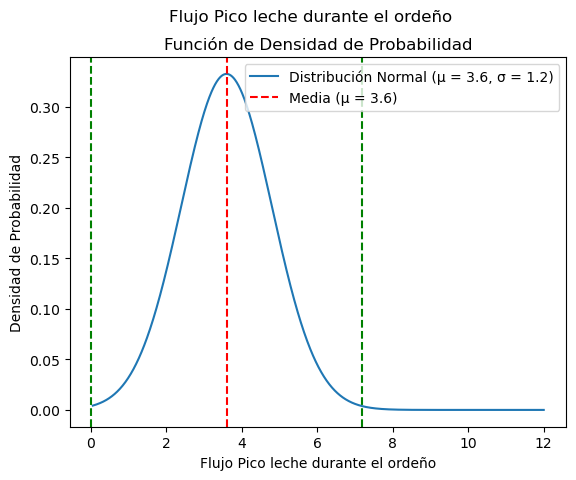

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

col = "Flujo Pico leche durante el ordeño"

# Parámetros de la distribución normal
mu = round(df_mast_dia[col].mean(), 1)    # media
sigma = round(df_mast_dia[col].std(),1) # desviación estándar
sigma_3 = round(3*sigma,1)

minimo = df_mast_dia[col].min()
maximo = df_mast_dia[col].max()

# Valores para los que queremos calcular la densidad
x = np.linspace(minimo, maximo, 1000)

# Calcular la densidad de probabilidad
pdf = norm.pdf(x, mu, sigma)

# Graficar la función de densidad
plt.plot(x, pdf, label=f'Distribución Normal (μ = {mu}, σ = {sigma})')
plt.xlabel(col)
plt.ylabel('Densidad de Probabilidad')
plt.title('Función de Densidad de Probabilidad')
plt.suptitle(col)
plt.axvline(mu, color='red', linestyle='--', label=f'Media (μ = {mu})')
plt.axvline(mu+sigma_3, color='green', linestyle='--')
plt.axvline(mu-sigma_3, color='green', linestyle='--')
plt.legend()
plt.show()


## CARGA DE LOS ARCHIVOS CON DATOS DE LA LACTANCIA (TEMPORALIDAD ESTACIONAL)

In [65]:
folder_lacs = "datos de lactancias"
nueva_ruta1 = ruta_base+folder+folder_lacs
nueva_ruta1

'/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/datos brutos iniciales tesis/datos de lactancias'

In [66]:
os.chdir(nueva_ruta1)
os.listdir()

['primer_trimestre_2024.xlsx',
 '.DS_Store',
 'primer_semestre_2023.xlsx',
 'segundo_semestre_2022.xlsx',
 'segundo_semestre_2023.xlsx',
 'primer_semestre_2022.xlsx',
 'primer_semestre_2021.xlsx',
 'segundo_semestre_2020.xlsx',
 'segundo_semestre_2021.xlsx',
 'dfs_lactancias.csv']

In [67]:
list_files_lacs = os.listdir()
list_files_lacs

['primer_trimestre_2024.xlsx',
 '.DS_Store',
 'primer_semestre_2023.xlsx',
 'segundo_semestre_2022.xlsx',
 'segundo_semestre_2023.xlsx',
 'primer_semestre_2022.xlsx',
 'primer_semestre_2021.xlsx',
 'segundo_semestre_2020.xlsx',
 'segundo_semestre_2021.xlsx',
 'dfs_lactancias.csv']

In [68]:
# Observacion de la cantidad de archivos y cuales tienen exclusivamente formato excel
print("N° de archivos en la carpeta:",len(list_files_lacs))
print("N° de archivos excel (xls):",len([file for file in list_files_lacs if "xls" in file]))

N° de archivos en la carpeta: 10
N° de archivos excel (xls): 8


In [69]:
list_files_lacs_xl = [file for file in list_files_lacs if "xls" in file]
list_files_lacs_xl

['primer_trimestre_2024.xlsx',
 'primer_semestre_2023.xlsx',
 'segundo_semestre_2022.xlsx',
 'segundo_semestre_2023.xlsx',
 'primer_semestre_2022.xlsx',
 'primer_semestre_2021.xlsx',
 'segundo_semestre_2020.xlsx',
 'segundo_semestre_2021.xlsx']

In [70]:
dfs_concatenados_lacs = pd.read_csv('dfs_lactancias.csv', sep=";", decimal="." )
dfs_concatenados_lacs

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_56274/3973618117.py:1: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs_concatenados_lacs = pd.read_csv('dfs_lactancias.csv', sep=";", decimal="." )


,N° de la Vaca,Grupo actual,Nº de Lactancia,Fecha,Dias de Descanso,Dias de Embarazo,Fecha del Ultimo Parto,Intervalo entre Partos,Edad en Dias,Fecha de nacimiento,Fecha del ultimo Celo,Modo del Ultimo Parto,Fecha del Ultimo Secado,Produccion 305 dias,Cantidad de Inseminaciones,Días de Embarazo en la Lactancia Previa,Numero de la Madre,Nombre del Toro,Numero del Toro,Fecha de la Primera Inseminacion,Eventos de Salud del sistema en la presente Lactancia,Eventos de Salud del sistema enlos ultimos 30 dias,Eventos de Salud del sistema enlos ultimos 365 dias,Nº de Celos del Sistema,Dias Abiertos,DEL/Edad en Dias,Dias del Sacado,Dias en Lactancia,Dias en Lactancia.1,Días secos de lactancia anterior,Dias Perdidos,name_file_lacs
0,6281600,Lote Ordeña Lote 1,7.0,01-01-2024,67.0,NaN,04-10-2023,NaN,3075.0,01-08-2015,09-12-2023,Facil,NaN,8241.204,1.0,280.0,NaN,NaN,NaN,10-12-2023,1.0,0.0,1.0,2.0,67.0,179.0,NaN,89.0,89.0,81.0,0.0,primer_trimestre_2024.xlsx
1,6281600,Lote Ordeña Lote 1,7.0,02-01-2024,67.0,NaN,04-10-2023,NaN,3076.0,01-08-2015,09-12-2023,Facil,NaN,8241.204,1.0,280.0,NaN,NaN,NaN,10-12-2023,1.0,0.0,1.0,2.0,67.0,179.0,NaN,90.0,90.0,81.0,0.0,primer_trimestre_2024.xlsx
2,6281600,Lote Ordeña Lote 1,7.0,03-01-2024,67.0,NaN,04-10-2023,NaN,3077.0,01-08-2015,09-12-2023,Facil,NaN,8241.204,1.0,280.0,NaN,NaN,NaN,10-12-2023,1.0,0.0,1.0,2.0,67.0,179.0,NaN,91.0,91.0,81.0,0.0,primer_trimestre_2024.xlsx
3,6281600,Lote Ordeña Lote 1,7.0,04-01-2024,67.0,NaN,04-10-2023,NaN,3078.0,01-08-2015,09-12-2023,Facil,NaN,8221.372,1.0,280.0,NaN,NaN,NaN,10-12-2023,1.0,0.0,1.0,2.0,67.0,179.0,NaN,92.0,92.0,81.0,0.0,primer_trimestre_2024.xlsx
4,6281600,Lote Ordeña Lote 1,7.0,05-01-2024,67.0,NaN,04-10-2023,NaN,3079.0,01-08-2015,09-12-2023,Facil,NaN,8221.372,1.0,280.0,NaN,NaN,NaN,10-12-2023,1.0,0.0,1.0,2.0,67.0,179.0,NaN,93.0,93.0,81.0,0.0,primer_trimestre_2024.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334693,22965506,Eliminadas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19-08-2023,NaN,NaN,NaN,NaN,NaN,NaN,19444487.0,Fable,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,segundo_semestre_2021.xlsx
1334694,22965533,Eliminadas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-08-2023,NaN,NaN,NaN,NaN,NaN,NaN,19443883.0,Eagle,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,segundo_semestre_2021.xlsx
1334695,22965548,Eliminadas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26-08-2023,NaN,NaN,NaN,NaN,NaN,NaN,19444379.0,Fable,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,segundo_semestre_2021.xlsx
1334696,22965658,Eliminadas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-10-2023,NaN,NaN,NaN,NaN,NaN,NaN,19444555.0,Fable,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,segundo_semestre_2021.xlsx


In [71]:
cols_fechas = dfs_concatenados_lacs.filter(like="Fe").columns.to_list()
cols_fechas

['Fecha',
 'Fecha del Ultimo Parto',
 'Fecha de nacimiento',
 'Fecha del ultimo Celo',
 'Fecha del Ultimo Secado',
 'Fecha de la Primera Inseminacion']

In [72]:
for col in cols_fechas:
    dfs_concatenados_lacs[col] = pd.to_datetime(dfs_concatenados_lacs[col], format="%d-%m-%Y")

dfs_concatenados_lacs[cols_fechas]

,Fecha,Fecha del Ultimo Parto,Fecha de nacimiento,Fecha del ultimo Celo,Fecha del Ultimo Secado,Fecha de la Primera Inseminacion
0,2024-01-01,2023-10-04,2015-08-01,2023-12-09,NaT,2023-12-10
1,2024-01-02,2023-10-04,2015-08-01,2023-12-09,NaT,2023-12-10
2,2024-01-03,2023-10-04,2015-08-01,2023-12-09,NaT,2023-12-10
3,2024-01-04,2023-10-04,2015-08-01,2023-12-09,NaT,2023-12-10
4,2024-01-05,2023-10-04,2015-08-01,2023-12-09,NaT,2023-12-10
...,...,...,...,...,...,...
1334693,NaT,NaT,2023-08-19,NaT,NaT,NaT
1334694,NaT,NaT,2023-08-24,NaT,NaT,NaT
1334695,NaT,NaT,2023-08-26,NaT,NaT,NaT
1334696,NaT,NaT,2023-10-01,NaT,NaT,NaT


In [73]:
indices = dfs_concatenados_lacs[dfs_concatenados_lacs["Nº de Lactancia"].isna()].index
print("Q de filas Nan en N° de lactancia:", len(indices))

Q de filas Nan en N° de lactancia: 687


In [74]:
dfs_concatenados_lacs.drop(indices, inplace=True)
dfs_concatenados_lacs.reset_index(drop=True, inplace=True)

In [75]:
indices = dfs_concatenados_lacs[dfs_concatenados_lacs["Nº de Lactancia"]==0].index
print("Q de filas 0 (cero) en N° de lactancia:", len(indices))

Q de filas 0 (cero) en N° de lactancia: 480083


In [76]:
# Creacion de un nuevo df donde se eliminan las lactancias 0 ya que no existen
print(dfs_concatenados_lacs.shape)
dfs_concatenados_lacs.drop(indices, inplace=True)
dfs_concatenados_lacs.reset_index(drop=True, inplace=True)
print(dfs_concatenados_lacs.shape)

(1334011, 32)
(853928, 32)


In [77]:
dfs_concatenados_lacs["code_lac"] = dfs_concatenados_lacs["N° de la Vaca"].astype(str) + ["-"] + dfs_concatenados_lacs["Nº de Lactancia"].astype(int).astype(str)+["-"]+dfs_concatenados_lacs["Fecha del Ultimo Parto"].astype(str)
dfs_concatenados_lacs["code_lac"] = dfs_concatenados_lacs["code_lac"].str.strip()
dfs_concatenados_lacs["code_lac"]

0          6281600-7-2023-10-04
1          6281600-7-2023-10-04
2          6281600-7-2023-10-04
3          6281600-7-2023-10-04
4          6281600-7-2023-10-04
                  ...          
853923    16323384-1-2021-08-25
853924    16323384-1-2021-08-25
853925    16323384-1-2021-08-25
853926    16323384-1-2021-08-25
853927    16323384-1-2021-08-25
Name: code_lac, Length: 853928, dtype: object

In [78]:
print("filas con code nan:", dfs_concatenados_lacs["code_lac"].isna().sum() )
print("filas con N° lac nan:", dfs_concatenados_lacs["Nº de Lactancia"].isna().sum() )
print("filas con N° vaca nan:", dfs_concatenados_lacs["N° de la Vaca"].isna().sum() )

filas con code nan: 0
filas con N° lac nan: 0
filas con N° vaca nan: 0


# UNION DE LOS DATOS GENERALES DE LA LACTANCIA CON LOS DATOS MEDIDOS DIA A DIA

In [79]:
df_mast_dia_copy = df_mast_dia.copy()

In [80]:
print("Vacas unicas en df datos diarios:", len(df_mast_dia_copy["N° de la Vaca"].unique()))
print("Vacas unicas en df datos lactancia:", len(dfs_concatenados_lacs["N° de la Vaca"].unique()))

Vacas unicas en df datos diarios: 1055
Vacas unicas en df datos lactancia: 1055


In [81]:
print("Forma del df original:", dfs_concatenados_lacs.shape)
print("Forma del df sin dupliados:", dfs_concatenados_lacs.drop_duplicates("code_lac").shape)

Forma del df original: (853928, 33)
Forma del df sin dupliados: (4508, 33)


In [82]:
## VER QUE COLUMNAS ELIMINAR DEL DF LACTANCIAS
dfs_concatenados_lacs.columns

Index(['N° de la Vaca', 'Grupo actual', 'Nº de Lactancia', 'Fecha',
       'Dias de Descanso', 'Dias de Embarazo', 'Fecha del Ultimo Parto',
       'Intervalo entre Partos', 'Edad en Dias', 'Fecha de nacimiento',
       'Fecha del ultimo Celo', 'Modo del Ultimo  Parto',
       'Fecha del Ultimo Secado', 'Produccion 305 dias',
       'Cantidad de Inseminaciones', 'Días de Embarazo en la Lactancia Previa',
       'Numero de la Madre', 'Nombre del Toro', 'Numero del Toro',
       'Fecha de la Primera Inseminacion',
       'Eventos de Salud del sistema en la presente Lactancia',
       'Eventos de Salud del sistema enlos ultimos 30 dias',
       'Eventos de Salud del sistema enlos ultimos 365 dias',
       'Nº de Celos del Sistema', 'Dias Abiertos', 'DEL/Edad en Dias',
       'Dias del Sacado', 'Dias en Lactancia', 'Dias en Lactancia.1',
       'Días secos de lactancia anterior', 'Dias Perdidos', 'name_file_lacs',
       'code_lac'],
      dtype='object')

In [83]:
# SELECCION DE LAS COLUMNAS RELEVANTES A UNIR ENTRE LOS DFS
cols_transfer = ['Fecha','Fecha de nacimiento','Fecha del Ultimo Parto', 'Modo del Ultimo  Parto',
                 'Cantidad de Inseminaciones','Nº de Celos del Sistema',
                 'Dias de Descanso', 'Dias de Embarazo', 'Días de Embarazo en la Lactancia Previa','Intervalo entre Partos', 
                 'Fecha del ultimo Celo', 'Fecha de la Primera Inseminacion','Fecha del Ultimo Secado',
                 'Produccion 305 dias',
                 'Numero de la Madre',
                 'Eventos de Salud del sistema en la presente Lactancia','Eventos de Salud del sistema enlos ultimos 30 dias','Eventos de Salud del sistema enlos ultimos 365 dias',
                 'Dias Abiertos', 'Dias del Sacado', 'Días secos de lactancia anterior', 'Dias Perdidos',
                 'name_file_lacs','code_lac']

In [84]:
print("Forma del df:", df_mast_dia_copy.shape)
#print("Largo cols duplicadas:", len(cols_no_duplicadas))
print("Total de cols al unir (-1 = code): " ,df_mast_dia_copy.shape[1]+dfs_concatenados_lacs[cols_transfer].shape[1])

#Union del df de forma tentativa
print("Forma del df resultante:", df_mast_dia_copy.merge(dfs_concatenados_lacs[cols_transfer].drop_duplicates("code_lac"), on="code_lac", how="left", suffixes= ("_dia","_lac") ).shape)

Forma del df: (1639611, 45)
Total de cols al unir (-1 = code):  69
Forma del df resultante: (1639611, 68)


In [85]:
dfs_concatenados_lacs[cols_transfer].head(10)

,Fecha,Fecha de nacimiento,Fecha del Ultimo Parto,Modo del Ultimo Parto,Cantidad de Inseminaciones,Nº de Celos del Sistema,Dias de Descanso,Dias de Embarazo,Días de Embarazo en la Lactancia Previa,Intervalo entre Partos,Fecha del ultimo Celo,Fecha de la Primera Inseminacion,Fecha del Ultimo Secado,Produccion 305 dias,Numero de la Madre,Eventos de Salud del sistema en la presente Lactancia,Eventos de Salud del sistema enlos ultimos 30 dias,Eventos de Salud del sistema enlos ultimos 365 dias,Dias Abiertos,Dias del Sacado,Días secos de lactancia anterior,Dias Perdidos,name_file_lacs,code_lac
0,2024-01-01,2015-08-01,2023-10-04,Facil,1.0,2.0,67.0,NaN,280.0,NaN,2023-12-09,2023-12-10,NaT,8241.204,NaN,1.0,0.0,1.0,67.0,NaN,81.0,0.0,primer_trimestre_2024.xlsx,6281600-7-2023-10-04
1,2024-01-02,2015-08-01,2023-10-04,Facil,1.0,2.0,67.0,NaN,280.0,NaN,2023-12-09,2023-12-10,NaT,8241.204,NaN,1.0,0.0,1.0,67.0,NaN,81.0,0.0,primer_trimestre_2024.xlsx,6281600-7-2023-10-04
2,2024-01-03,2015-08-01,2023-10-04,Facil,1.0,2.0,67.0,NaN,280.0,NaN,2023-12-09,2023-12-10,NaT,8241.204,NaN,1.0,0.0,1.0,67.0,NaN,81.0,0.0,primer_trimestre_2024.xlsx,6281600-7-2023-10-04
3,2024-01-04,2015-08-01,2023-10-04,Facil,1.0,2.0,67.0,NaN,280.0,NaN,2023-12-09,2023-12-10,NaT,8221.372,NaN,1.0,0.0,1.0,67.0,NaN,81.0,0.0,primer_trimestre_2024.xlsx,6281600-7-2023-10-04
4,2024-01-05,2015-08-01,2023-10-04,Facil,1.0,2.0,67.0,NaN,280.0,NaN,2023-12-09,2023-12-10,NaT,8221.372,NaN,1.0,0.0,1.0,67.0,NaN,81.0,0.0,primer_trimestre_2024.xlsx,6281600-7-2023-10-04
5,2024-01-06,2015-08-01,2023-10-04,Facil,1.0,2.0,67.0,NaN,280.0,NaN,2023-12-09,2023-12-10,NaT,8221.372,NaN,1.0,0.0,1.0,67.0,NaN,81.0,0.0,primer_trimestre_2024.xlsx,6281600-7-2023-10-04
6,2024-01-07,2015-08-01,2023-10-04,Facil,1.0,2.0,67.0,NaN,280.0,NaN,2023-12-09,2023-12-10,NaT,8221.372,NaN,1.0,0.0,1.0,67.0,NaN,81.0,0.0,primer_trimestre_2024.xlsx,6281600-7-2023-10-04
7,2024-01-08,2015-08-01,2023-10-04,Facil,1.0,2.0,67.0,NaN,280.0,NaN,2023-12-09,2023-12-10,NaT,8221.372,NaN,1.0,0.0,1.0,67.0,NaN,81.0,0.0,primer_trimestre_2024.xlsx,6281600-7-2023-10-04
8,2024-01-09,2015-08-01,2023-10-04,Facil,1.0,2.0,67.0,NaN,280.0,NaN,2023-12-09,2023-12-10,NaT,8221.372,NaN,1.0,0.0,1.0,67.0,NaN,81.0,0.0,primer_trimestre_2024.xlsx,6281600-7-2023-10-04
9,2024-01-10,2015-08-01,2023-10-04,Facil,1.0,2.0,67.0,NaN,280.0,NaN,2023-12-09,2023-12-10,NaT,8221.372,NaN,1.0,0.0,1.0,67.0,NaN,81.0,0.0,primer_trimestre_2024.xlsx,6281600-7-2023-10-04


In [86]:
# Observacion de las distintas columnas para identificar lo que cambia para cambio de dia a dia en la columna "Fecha"

# Edad en dias esta bien calculado (borrar)
# Dias abiertos no cambian y deberia, si no ha sido cubierta (a lo mejor corresponde lactancia anterior)
# DEL/Edad en Días no entiendo su calculo de base del software (borrar)
# Dias en Lactancia y Dias en Lactancia.1 estan bien calculados respecto de la fecha y la fecha del ultimo parto (se deben borrar)

In [87]:
print(df_mast_dia_copy.shape)
df_merge = df_mast_dia_copy.merge(dfs_concatenados_lacs[cols_transfer].drop_duplicates("code_lac"), on="code_lac", how="left", suffixes= ("_dia","_lac") )
print(df_merge.shape)

(1639611, 45)
(1639611, 68)


In [89]:
df_merge["Nº de Lactancia"].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [90]:
print(len(df_merge[df_merge["TIPO DE EVENTO"].notna()]["code_date"].unique()))
print(df_merge[df_merge["TIPO DE EVENTO"].notna()].shape[0])

790
1580


## LIMPIEZA Y DEPURACION DEL ARCHIVO UNIDO

In [91]:
### REVISION DE COLUMNAS IMPORTANTES PARA DETERMINAR COHERENCIA Y CONSISTENCIA EN LA UNION

print(df_merge.shape[0])

print((df_merge["Fecha del Ultimo Parto_dia"] == df_merge["Fecha del Ultimo Parto_lac"]).sum())

# EN TEORIA NO DEBERIAN SER DISTINTAS, YA QUE FUERON UNIDAS POR UN CODIGO UNICO QUE CONSIDERA LA FECHA DE PARTO
print((df_merge["Fecha del Ultimo Parto_dia"] != df_merge["Fecha del Ultimo Parto_lac"]).sum())

print("Porciento:",(((df_merge["Fecha del Ultimo Parto_dia"] != df_merge["Fecha del Ultimo Parto_lac"]).sum() / df_merge.shape[0]) *100))

print("Si la Q de filas son iguales es porque no hay diferencias")

1639611
1639611
0
Porciento: 0.0
Si la Q de filas son iguales es porque no hay diferencias


In [92]:
# SE ELIMINAN LAS LACTANCIAS NAN, YA QUE POR ALGUN MOTIVO NO TIENEN LACTANCIA
indices = df_merge[df_merge["code_lac"].str.contains("nan")].index
print(len(indices))

#df_merge.drop(indices, inplace=True)

0


In [93]:
print(df_merge[df_merge["Fecha del Ultimo Parto_dia"].isna()].shape)
print(df_merge[df_merge["Fecha del Ultimo Parto_lac"].isna()].shape)

(0, 68)
(0, 68)


In [94]:
# No hay valores nan en las columnas Fecha ultimo Parto

## SGTES IDEAS LIMPIEZA O REVISION UNIDO AL TARGET

In [95]:
print( (df_merge[df_merge["TIPO DE EVENTO"].notna()].shape[0] / df_merge.shape[0]  * 100), "%")

df_merge[df_merge["TIPO DE EVENTO"].notna()]["Fecha_dia"].dt.year.value_counts().sort_index()

0.09636432056140146 %


Fecha_dia
2021    292
2022    510
2023    682
2024     96
Name: count, dtype: int64

In [96]:
print("Q de lacs ceros:", df_merge[df_merge["Nº de Lactancia"]==0].shape[0])
print("Porcentaje %:",(df_merge[df_merge["Nº de Lactancia"]==0].shape[0] / df_merge.shape[0]) * 100)
print("Fechas nacimientos nan:", df_merge[df_merge["Fecha de nacimiento"].isna()].shape[0])

Q de lacs ceros: 0
Porcentaje %: 0.0
Fechas nacimientos nan: 0


In [97]:
print("forma del df_merge:", df_merge.shape)
print("*Visualizacion de las primeras 25 columnas con mayores valores NAN en Q y %")
print(df_merge.isna().sum().sort_values(ascending=False).head(25), "\n")
print((df_merge.isna().sum().sort_values(ascending=False).head(25) / df_merge.shape[0])*100)

forma del df_merge: (1639611, 68)
*Visualizacion de las primeras 25 columnas con mayores valores nan en Q y %
Intervalo entre Partos                                                                   1639611
OBSERVACIONES                                                                            1639233
PERÍODO DE RESGUARDO LECHE                                                               1638785
MASTITIS                                                                                 1638783
TRATAMIENTO                                                                              1638409
DOSIS (ML)                                                                               1638409
DIAS DE TRATAMIENTO                                                                      1638409
TIPO DE EVENTO                                                                           1638031
Numero de Probabilidad de Preñez                                                         1617594
Dias del Sacado  

In [98]:
# Eliminacion de Columnas que presentan más del ??% con valores nan

limite = 50
mask = ((df_merge.isna().sum().sort_values(ascending=False) / df_merge.shape[0])*100) > limite

cols_mask = mask[mask].index.to_list()
cols_mask.remove("TIPO DE EVENTO")
cols_mask.remove("PERÍODO DE RESGUARDO LECHE")
cols_mask.remove("DIAS DE TRATAMIENTO")
cols_mask

['Intervalo entre Partos',
 'OBSERVACIONES',
 'MASTITIS',
 'TRATAMIENTO',
 'DOSIS (ML)',
 'Numero de Probabilidad de Preñez',
 'Dias del Sacado',
 'Dias de Embarazo',
 'Numero de la Madre',
 'Fecha del Ultimo Secado',
 'Cambio en la Conductividad en Deviaciones Estandar',
 'Cambio en la Conductividad en porcentaje',
 'Numero del Toro',
 'Nombre del Toro']

In [99]:
df_merge[cols_mask].isna().sum() / df_merge.shape[0] * 100

Intervalo entre Partos                                100.000000
OBSERVACIONES                                          99.976946
MASTITIS                                               99.949500
TRATAMIENTO                                            99.926690
DOSIS (ML)                                             99.926690
Numero de Probabilidad de Preñez                       98.657181
Dias del Sacado                                        95.989049
Dias de Embarazo                                       93.130932
Numero de la Madre                                     82.532137
Fecha del Ultimo Secado                                65.691801
Cambio en la Conductividad en Deviaciones Estandar     60.186593
Cambio en la Conductividad en porcentaje               60.186593
Numero del Toro                                        51.415732
Nombre del Toro                                        51.415732
dtype: float64

In [100]:
df_merge.drop(cols_mask, axis=1, inplace=True)

In [101]:
print("forma del df_merge:", df_merge.shape)
print("*Visualizacion de las primeras 25 columnas con mayores valores NAN nuevamente en Q y %")
print(df_merge.isna().sum().sort_values(ascending=False).head(25), "\n")
print((df_merge.isna().sum().sort_values(ascending=False).head(25) / df_merge.shape[0])*100)

forma del df_merge: (1639611, 54)
*Visualizacion de las primeras 25 columnas con mayores valores NAN nuevamente en Q y %
PERÍODO DE RESGUARDO LECHE                                                               1638785
DIAS DE TRATAMIENTO                                                                      1638409
TIPO DE EVENTO                                                                           1638031
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos     598077
Días secos de lactancia anterior                                                          538641
Porcentaje de leche a los 2 minutos                                                       508456
Produccion de Leche a los 2 minutos                                                       508031
Flujo a los 120 segundos                                                                  502799
Flujo a los 60 segundos                                                                   491750
Flujo 

## Observación de valores nan en columnas claves y tomar decisiones

In [102]:
print(df_merge.shape[0], ": forma del df_merge")
print(df_merge["Leche Diaria"].isna().sum(), ": Q de registros NAN en Leche Diaria")
print(df_merge["Porduccion del Turno"].isna().sum(),": Q de registros NAN en Produccion del Turno")

1639611 : forma del df_merge
319698 : Q de registros NAN en Leche Diaria
331710 : Q de registros NAN en Produccion del Turno


In [103]:
#REVISION DE LOS REGISTROS NAN EN LA VARIABLE "Leche Diaria"
col_nan_1ra = "Leche Diaria" #Esta es la primera porque es la suma de la produccion del turno
col_nan_2da = "Porduccion del Turno" #Es la segunda porque puede que en algun turno no se haya ordeñado la vaca
nan_1y2 = df_merge[df_merge[col_nan_1ra].isna()][col_nan_2da].isna()
indices_nan_1y2 = nan_1y2[nan_1y2].index.to_list()
print("Q de indices Nan compartidos:", len(indices_nan_1y2))
print("")
print(df_merge[df_merge["Leche Diaria"].isna()][["Leche Diaria","Porduccion del Turno"]].isna().sum())

Q de indices Nan compartidos: 319698

Leche Diaria            319698
Porduccion del Turno    319698
dtype: int64


In [104]:
df_merge[df_merge["Leche Diaria"].isna()].isna().sum().sort_values(ascending=False)

Porcentaje de leche a los 2 minutos                                                      319698
Flujo a los 120 segundos                                                                 319698
Punto de Ordeño                                                                          319698
Produccion de Leche a los 2 minutos                                                      319698
Hora Individual del ordeño por Turno                                                     319698
Hora de inicio del Ordeño de la Vaca                                                     319698
Flujo Promedio leche durante el ordeño                                                   319698
Porduccion del Turno                                                                     319698
Flujo Pico leche durante el ordeño                                                       319698
Flujo de leche al retiro                                                                 319698
Flujo Pico leche durante el Tiempo de or

In [109]:
print("Forma del df con Nans en las columnas seleccionadas:", df_merge.loc[indices_nan_1y2].shape[0]/df_merge.shape[0]*100, "%")
df_merge.loc[indices_nan_1y2].isna().sum().sort_values(ascending=False).head(25)/df_merge.loc[indices_nan_1y2].shape[0]*100
# Hay muchas columnas en su totalidad con valores nan, por lo tanto se eliminaran estas filas, ya que es demasiado para rellenar mediante algún metodo

Forma del df con Nans en las columnas seleccionadas: 19.498405414455014 %


Porcentaje de leche a los 2 minutos                                                      100.000000
Flujo a los 120 segundos                                                                 100.000000
Punto de Ordeño                                                                          100.000000
Produccion de Leche a los 2 minutos                                                      100.000000
Hora Individual del ordeño por Turno                                                     100.000000
Hora de inicio del Ordeño de la Vaca                                                     100.000000
Flujo Promedio leche durante el ordeño                                                   100.000000
Porduccion del Turno                                                                     100.000000
Flujo Pico leche durante el ordeño                                                       100.000000
Flujo de leche al retiro                                                                 100.000000


In [110]:
print("Forma del df en base a los indices con valores NaN compartidos (en leche y produccion del turno):", df_merge.loc[indices_nan_1y2][df_merge.loc[indices_nan_1y2,"TIPO DE EVENTO"].notna()].shape)
print(df_merge.loc[indices_nan_1y2][df_merge.loc[indices_nan_1y2,"TIPO DE EVENTO"].notna()]["Turno"].value_counts())
df_merge.loc[indices_nan_1y2][df_merge.loc[indices_nan_1y2,"TIPO DE EVENTO"].notna()]

Forma del df en base a los indices con valores NaN compartidos (en leche y produccion del turno): (66, 54)
Turno
Manana    33
Tarde     33
Name: count, dtype: int64


,N° de la Vaca,Grupo actual,Estado de Lactancia,Fecha_dia,Nº de Lactancia,Turno,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo de leche al retiro,Flujo Pico leche durante el ordeño,Flujo Pico leche durante el Tiempo de ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Hora de inicio del Ordeño de la Vaca,Hora Individual del ordeño por Turno,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Punto de Ordeño,Actividad Diaria,Ruminacion Diaria,Fecha del Ultimo Parto_dia,Indice de Salud de Vacas en Ordeño,Leche en Lactancia,Produccion en Vida,Leche Diaria,Porduccion del Turno,name_file,code_date,TIPO DE EVENTO,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE,code_lac,Fecha_lac,Fecha de nacimiento,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Cantidad de Inseminaciones,Nº de Celos del Sistema,Dias de Descanso,Días de Embarazo en la Lactancia Previa,Fecha del ultimo Celo,Fecha de la Primera Inseminacion,Produccion 305 dias,Eventos de Salud del sistema en la presente Lactancia,Eventos de Salud del sistema enlos ultimos 30 dias,Eventos de Salud del sistema enlos ultimos 365 dias,Dias Abiertos,Días secos de lactancia anterior,Dias Perdidos,name_file_lacs
197668,11472885,Lote Ordeña Lote 1,Seca,2021-07-06,2.0,Manana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-30,NaN,7186.85,13331.759998,NaN,NaN,3er_trim_2021.xlsx,11472885-2021-07-06,Mastitis,3.0,NaN,11472885-2-2021-08-30,2021-07-01,2017-01-22,2021-08-30,Facil,2.0,2.0,51.0,275.0,2021-10-21,2021-10-22,7294.504,9.0,1.0,9.0,74.0,60.0,23.0,segundo_semestre_2021.xlsx
197669,11472885,Lote Ordeña Lote 1,Seca,2021-07-06,2.0,Tarde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-30,NaN,7186.85,13331.759998,NaN,NaN,3er_trim_2021.xlsx,11472885-2021-07-06,Mastitis,3.0,NaN,11472885-2-2021-08-30,2021-07-01,2017-01-22,2021-08-30,Facil,2.0,2.0,51.0,275.0,2021-10-21,2021-10-22,7294.504,9.0,1.0,9.0,74.0,60.0,23.0,segundo_semestre_2021.xlsx
216816,5669658,Lote Desecho,Antes,2021-07-30,9.0,Manana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-27,NaN,6.33,17819.361980,NaN,NaN,3er_trim_2021.xlsx,5669658-2021-07-30,Mastitis,3.0,NaN,5669658-9-2021-07-27,2022-01-01,2011-10-17,2021-07-27,Facil,1.0,2.0,113.0,276.0,2021-11-16,2021-11-17,8251.217,8.0,0.0,13.0,113.0,66.0,0.0,primer_semestre_2022.xlsx
216817,5669658,Lote Desecho,Antes,2021-07-30,9.0,Tarde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-27,NaN,6.33,17819.361980,NaN,NaN,3er_trim_2021.xlsx,5669658-2021-07-30,Mastitis,3.0,NaN,5669658-9-2021-07-27,2022-01-01,2011-10-17,2021-07-27,Facil,1.0,2.0,113.0,276.0,2021-11-16,2021-11-17,8251.217,8.0,0.0,13.0,113.0,66.0,0.0,primer_semestre_2022.xlsx
261126,16323553,Lote Ordeña Lote 1,Calostro,2021-09-14,1.0,Manana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-13,NaN,0.00,NaN,NaN,NaN,3er_trim_2021.xlsx,16323553-2021-09-14,Mastitis,3.0,NaN,16323553-1-2021-09-13,2022-01-01,2019-11-27,2021-09-13,Leve Ayuda,1.0,4.0,46.0,282.0,2022-05-11,2021-10-29,5196.851,2.0,0.0,2.0,46.0,NaN,0.0,primer_semestre_2022.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635902,6282249,Lote Ordeña Lote 1,Inseminada,2024-03-30,6.0,Tarde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-12,NaN,3653.66,26998.555041,NaN,NaN,1er_trim_2024.xlsx,6282249-2024-03-30,Mastitis,NaN,NaN,6282249-6-2023-11-12,2024-01-01,2017-02-21,2023-11-12,Facil,1.0,4.0,50.0,272.0,2024-03-04,2024-01-01,8509.972,0.0,0.0,0.0,50.0,78.0,0.0,primer_trimestr

In [111]:
df_merge.loc[indices_nan_1y2][df_merge.loc[indices_nan_1y2,"TIPO DE EVENTO"].notna()].notna().sum().sort_values(ascending=False) 

N° de la Vaca                                                                            66
Cantidad de Inseminaciones                                                               66
Grupo actual                                                                             66
name_file                                                                                66
code_date                                                                                66
TIPO DE EVENTO                                                                           66
code_lac                                                                                 66
Fecha_lac                                                                                66
Fecha de nacimiento                                                                      66
Fecha del Ultimo Parto_lac                                                               66
Nº de Celos del Sistema                                                         

In [112]:
# Pensaba imputar la columna de leche diaria, ya que tiene de alguna forma un distribucion clara y uniforme en tiempo y normalidad
# Pero la eliminaré, ya que a la vez las filas con valores nan en Leche diaria, también tienen valores nan y la gran mayoría de las otras columnas
# Leche diaria es un de las columnas relevantes en el estudio, a criterio personal

In [113]:
df_merge.loc[indices_nan_1y2]['Estado de  Lactancia'].value_counts()

Estado de  Lactancia
Seca                256748
Preñada              29022
Inseminada           14969
Antes                 6458
Lista                 4442
Sin Celo              4395
Calostro              2936
Abierta Sin Celo       394
Abierto                334
Name: count, dtype: int64

In [114]:
print("Forma del df antes de eliminar:", df_merge.shape)
df_merge.drop(indices_nan_1y2,  inplace=True)
df_merge.reset_index(drop=True, inplace=True)
print(df_merge.shape)
df_merge

Forma del df antes de eliminar: (1639611, 54)
(1319913, 54)


,N° de la Vaca,Grupo actual,Estado de Lactancia,Fecha_dia,Nº de Lactancia,Turno,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Coductividad Maxima 1,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo de leche al retiro,Flujo Pico leche durante el ordeño,Flujo Pico leche durante el Tiempo de ordeño,Flujo Promedio leche durante el ordeño,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Hora de inicio del Ordeño de la Vaca,Hora Individual del ordeño por Turno,Porcentaje de leche a los 2 minutos,Produccion de Leche a los 2 minutos,Punto de Ordeño,Actividad Diaria,Ruminacion Diaria,Fecha del Ultimo Parto_dia,Indice de Salud de Vacas en Ordeño,Leche en Lactancia,Produccion en Vida,Leche Diaria,Porduccion del Turno,name_file,code_date,TIPO DE EVENTO,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE,code_lac,Fecha_lac,Fecha de nacimiento,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Cantidad de Inseminaciones,Nº de Celos del Sistema,Dias de Descanso,Días de Embarazo en la Lactancia Previa,Fecha del ultimo Celo,Fecha de la Primera Inseminacion,Produccion 305 dias,Eventos de Salud del sistema en la presente Lactancia,Eventos de Salud del sistema enlos ultimos 30 dias,Eventos de Salud del sistema enlos ultimos 365 dias,Dias Abiertos,Días secos de lactancia anterior,Dias Perdidos,name_file_lacs
0,5669658,Lote Desecho,Lista,2020-10-01,8.0,Manana,2.147766,0.0,660.0,1620.0,2220.0,2700.0,120.0,3.30,00:06:20,2.014778,1.996857,05:24:35,00:10:09,19.0,4.0,5.0,NaN,NaN,2020-07-10,100.000000,2725.09,11150.077984,40.580002,20.450001,4to_trim_2020.xlsx,5669658-2020-10-01,NaN,NaN,NaN,5669658-8-2020-07-10,2021-01-01,2011-10-17,2020-07-10,Facil,1.0,5.0,106.0,274.0,2020-10-23,2020-10-24,9339.396,10.0,1.0,14.0,106.0,85.0,0.0,primer_semestre_2021.xlsx
1,5669658,Lote Desecho,Lista,2020-10-01,8.0,Tarde,2.147766,5.8,1380.0,2700.0,2700.0,3180.0,120.0,3.66,00:05:30,2.586296,5.044000,16:43:29,00:07:47,24.0,5.0,16.0,NaN,NaN,2020-07-10,100.000000,2725.09,11150.077984,40.580002,20.129999,4to_trim_2020.xlsx,5669658-2020-10-01,NaN,NaN,NaN,5669658-8-2020-07-10,2021-01-01,2011-10-17,2020-07-10,Facil,1.0,5.0,106.0,274.0,2020-10-23,2020-10-24,9339.396,10.0,1.0,14.0,106.0,85.0,0.0,primer_semestre_2021.xlsx
2,6280882,Eliminadas,Lista,2020-10-01,6.0,Manana,NaN,0.0,1350.0,2640.0,3000.0,3180.0,120.0,3.90,00:01:30,2.539946,3.240143,06:56:18,00:06:13,32.0,5.2,25.0,NaN,NaN,2020-07-31,100.000000,1402.84,7886.865000,29.139999,15.790000,4to_trim_2020.xlsx,6280882-2020-10-01,NaN,NaN,NaN,6280882-6-2020-07-31,2021-01-01,2014-09-04,2020-07-31,Facil,2.0,5.0,82.0,275.0,2020-11-10,2020-10-21,6709.683,8.0,1.0,9.0,102.0,55.0,20.0,primer_semestre_2021.xlsx
3,6280882,Eliminadas,Lista,2020-10-01,6.0,Tarde,0.000000,5.3,900.0,2940.0,3180.0,3780.0,240.0,3.78,00:02:00,2.412651,3.093000,17:56:10,00:05:32,38.0,5.1,22.0,NaN,NaN,2020-07-31,100.000000,1402.84,7886.865000,29.139999,13.350000,4to_trim_2020.xlsx,6280882-2020-10-01,NaN,NaN,NaN,6280882-6-2020-07-31,2021-01-01,2014-09-04,2020-07-31,Facil,2.0,5.0,82.0,275.0,2020-11-10,2020-10-21,6709.683,8.0,1.0,9.0,102.0,55.0,20.0,primer_semestre_2021.xlsx
4,6281046,Eliminadas,Lista,2020-10-01,5.0,Manana,1.511111,5.5,1680.0,3360.0,3780.0,3780.0,240.0,5.04,00:03:50,3.343109,2.810000,06:20:44,00:05:41,33.0,6.4,21.0,NaN,NaN,2020-08-01,100.000000,1575.97,8792.100987,33.860001,19.000000,4to_trim_2020.xlsx,6281046-2020-10-01,NaN,NaN,NaN,6281046-5-2020-08-01,2021-01-01,2014-04-15,2020-08-01,Facil,2.0,6.0,118.0,279.0,2020-12-19,2020-11-27,7219.297,6.0,2.0,9.0,140.0,56.0,22.0,primer_semestre_2021.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319908,19444641,Lote Ordeña Lote 1,Preñada,2024-03-11,1.0,Tarde,1.388889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.255857,NaN,NaN,NaN,NaN

In [115]:
print(n_filas_m, ": Q de registros iniciales de mastitis")
df_merge[["TIPO DE EVENTO","Turno"]].value_counts()

1580 : Q de registros iniciales de mastitis


TIPO DE EVENTO  Turno 
Mastitis        Manana    757
                Tarde     757
Name: count, dtype: int64

In [116]:
print("forma del df_merge:", df_merge.shape)
print("*Visualizacion de las primeras 25 columnas con mayores valores nan en Q y %")
print(df_merge.isna().sum().sort_values(ascending=False).head(25), "\n")
print((df_merge.isna().sum().sort_values(ascending=False).head(25) / df_merge.shape[0])*100)

forma del df_merge: (1319913, 54)
*Visualizacion de las primeras 25 columnas con mayores valores nan en Q y %
PERÍODO DE RESGUARDO LECHE                                                               1319109
DIAS DE TRATAMIENTO                                                                      1318743
TIPO DE EVENTO                                                                           1318399
Días secos de lactancia anterior                                                          429082
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos     280324
Actividad Diaria                                                                          234188
Ruminacion Diaria                                                                         234188
Porcentaje de leche a los 2 minutos                                                       188758
Produccion de Leche a los 2 minutos                                                       188333
Flujo a los 120 s

In [117]:
print("Forma del df_merge original:", df_merge.shape)
print("Forma del df CON valores nan en la col 'Leche Diaria':", df_merge[df_merge["Leche Diaria"].isna()].shape)
print("Forma del df SIN valores nan en la col 'Leche Diaria':", df_merge[df_merge["Leche Diaria"].notna()].shape)
print("")
print("La cantidad de filas es el doble ya que hay 2 mediciones de leche por día debido a las 2 ordeñas diarias")
print(df_merge[df_merge["Leche Diaria"].notna()].groupby((df_merge["Fecha_dia"].dt.year)).size())
print("")
print("Porcentaje de registros por año:")
print(df_merge[df_merge["Leche Diaria"].notna()].groupby((df_merge["Fecha_dia"].dt.year)).size() / df_merge[df_merge["Leche Diaria"].notna()].shape[0]*100)

Forma del df_merge original: (1319913, 54)
Forma del df CON valores nan en la col 'Leche Diaria': (0, 54)
Forma del df SIN valores nan en la col 'Leche Diaria': (1319913, 54)

La cantidad de filas es el doble ya que hay 2 mediciones de leche por día debido a las 2 ordeñas diarias
Fecha_dia
2020     55684
2021    254416
2022    367098
2023    507417
2024    135298
dtype: int64

Porcentaje de registros por año:
Fecha_dia
2020     4.218763
2021    19.275210
2022    27.812288
2023    38.443216
2024    10.250524
dtype: float64


In [118]:
# OBSERVAR CUANTAS VACAS DISTINTAS HAY POR AÑO
print(df_merge[df_merge["Leche Diaria"].notna()].groupby(df_merge["Fecha_dia"].dt.year)["N° de la Vaca"].nunique())
print(df_merge[df_merge["Leche Diaria"].notna()].groupby(df_merge["Fecha_dia"].dt.year)[["Leche Diaria","Produccion 305 dias", "Nº de Lactancia"]].mean())

Fecha_dia
2020     357
2021     522
2022     779
2023    1043
2024     985
Name: N° de la Vaca, dtype: int64
           Leche Diaria  Produccion 305 dias  Nº de Lactancia
Fecha_dia                                                    
2020          24.196167          6465.824601         2.071762
2021          19.613961          6273.513600         2.169981
2022          19.740867          6275.141928         2.466230
2023          19.698852          6385.318356         2.683367
2024          19.415728          6540.261472         2.819628


### REVISION PARALELA DE INFORMACION CON POTENCIAL UTILIDAD

2.512187915273268 media de lactancias


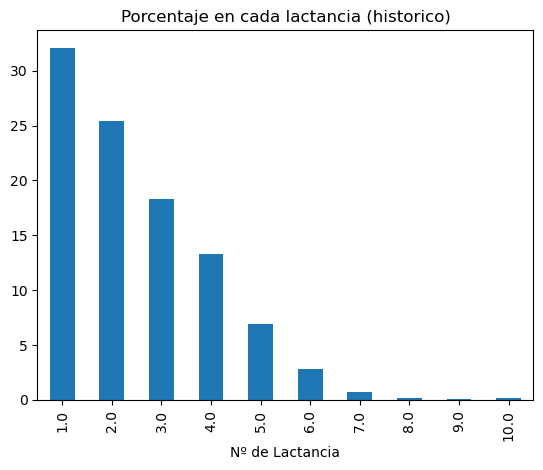

In [119]:
print(df_merge.drop_duplicates("code_date")["Nº de Lactancia"].mean(),"media de lactancias")
(df_merge.drop_duplicates("code_date").groupby("Nº de Lactancia").size() / df_merge.drop_duplicates("code_date").groupby("Nº de Lactancia").size().sum() * 100).plot(kind="bar")
plt.title("Porcentaje en cada lactancia (historico)")
plt.show()

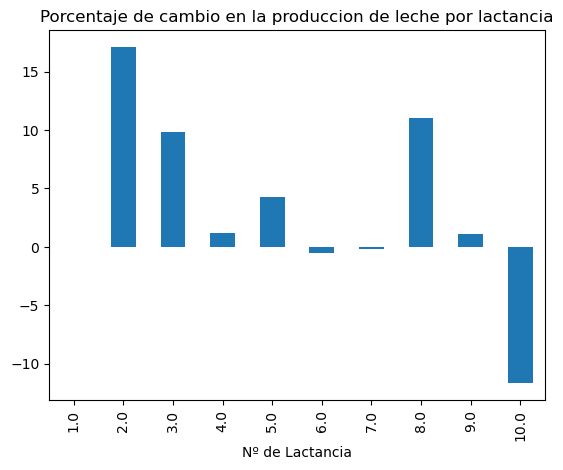

In [120]:
(df_merge.groupby("Nº de Lactancia")["Produccion 305 dias"].mean().diff() / df_merge.groupby("Nº de Lactancia")["Produccion 305 dias"].mean()*100).plot(kind="bar")
plt.title("Porcentaje de cambio en la produccion de leche por lactancia")
plt.show()

7226.727015249581 : media de produccion de leche a 305 dias del rebaño (historico)


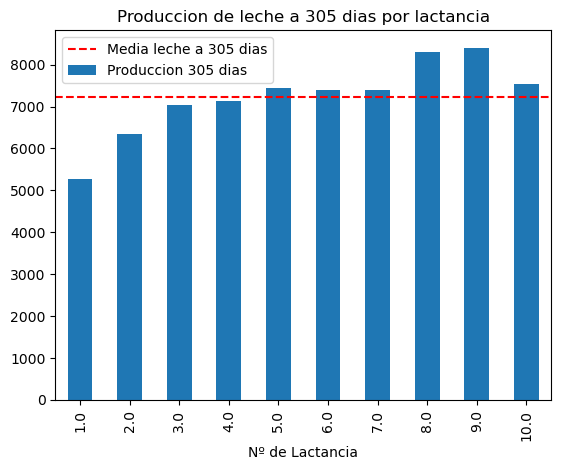

In [121]:
print(df_merge.groupby("Nº de Lactancia")["Produccion 305 dias"].mean().mean(),": media de produccion de leche a 305 dias del rebaño (historico)")
df_merge.groupby("Nº de Lactancia")["Produccion 305 dias"].mean().plot(kind="bar")
plt.axhline(df_merge.groupby("Nº de Lactancia")["Produccion 305 dias"].mean().mean(), color="red", linestyle="--", label="Media leche a 305 dias")
plt.legend()
plt.title("Produccion de leche a 305 dias por lactancia")
plt.show()

## PRESELECCION DE COLUMNAS RELEVANTES PARA EL ESTUDIO Y AVERIGUAR SU ESTADO

In [122]:
### Luego de eliminar una gran cantidad de filas y columnas con muchos valores nan (preliminarmente, en base a la expertiz personal del profesional)

In [123]:
print("forma del df_merge:", df_merge.shape)
print("*Visualizacion de las primeras 25 columnas con mayores valores nan en Q y %")
print(df_merge.isna().sum().sort_values(ascending=False).head(25), "\n")
print((df_merge.isna().sum().sort_values(ascending=False).head(25) / df_merge.shape[0])*100)

forma del df_merge: (1319913, 54)
*Visualizacion de las primeras 25 columnas con mayores valores nan en Q y %
PERÍODO DE RESGUARDO LECHE                                                               1319109
DIAS DE TRATAMIENTO                                                                      1318743
TIPO DE EVENTO                                                                           1318399
Días secos de lactancia anterior                                                          429082
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos     280324
Actividad Diaria                                                                          234188
Ruminacion Diaria                                                                         234188
Porcentaje de leche a los 2 minutos                                                       188758
Produccion de Leche a los 2 minutos                                                       188333
Flujo a los 120 s

Forma del df original: (1319913, 54)
*Observacion grafica de la frecuencia de las distintas columnas y sus valores nan
nan   122930
% nan  9.313492631711332


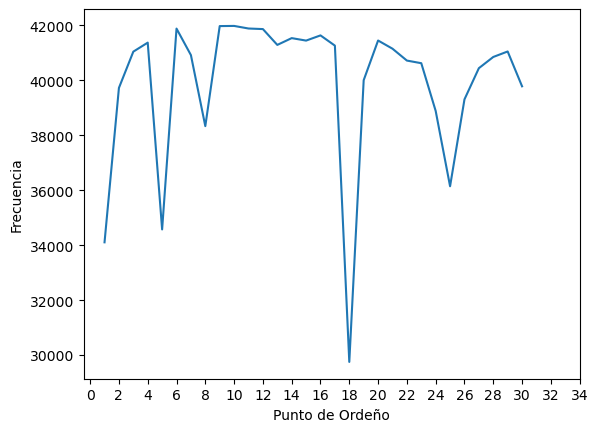

In [124]:
print("Forma del df original:", df_merge.shape)
print("*Observacion grafica de la frecuencia de las distintas columnas y sus valores nan")
#'Días de Embarazo en la Lactancia Previa','Fecha del ultimo Celo', 'Fecha de la Primera Inseminacion','Produccion 305 dias'

col = "Punto de Ordeño"

print("nan  ", df_merge[col].isna().sum())
print("% nan ", df_merge[col].isna().sum()/ df_merge[col].shape[0]*100)
df_merge.groupby([col]).size().plot()
plt.ylabel('Frecuencia')
plt.xticks(np.arange(0, 36, 2))
plt.show()

In [129]:
#DETERMINACION DE LAS COLUMNAS UTILES PARA EL ANALISIS (EN BASE AL ESTADO DEL ARTE (BLIBLIOGRAFIA) Y LA EXPERTIZ DEL PROFESIONAL)
cols_utils = [
    'Fecha_dia','N° de la Vaca', 'Fecha de nacimiento','Estado de  Lactancia',
    'Grupo actual',"Cantidad de Inseminaciones",'Nº de Celos del Sistema','Días secos de lactancia anterior',
    'code_lac','Fecha del Ultimo Parto_lac','Modo del Ultimo  Parto','Nº de Lactancia',
    'Turno', 'Punto de Ordeño','Porduccion del Turno','Leche Diaria',
    #'Cambio en la Conductividad en porcentaje', 'Cambio en la Conductividad en Deviaciones Estandar',
    'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos','Coductividad Maxima 1',
    'Flujo a los 15 segundos','Flujo a los 30 segundos', 'Flujo a los 60 segundos','Flujo a los 120 segundos',
    'Flujo de leche al retiro','Flujo Pico leche durante el ordeño','Flujo Pico leche durante el Tiempo de ordeño ','Flujo Promedio leche durante el ordeño',
    'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal',
    'Hora de inicio del Ordeño de la Vaca','Hora Individual del ordeño por Turno',
    'Porcentaje de leche a los 2 minutos','Produccion de Leche a los 2 minutos', 
    'Actividad Diaria', 'Ruminacion Diaria','Indice de Salud de Vacas en Ordeño',
    'Eventos de Salud del sistema en la presente Lactancia','Eventos de Salud del sistema enlos ultimos 30 dias','Eventos de Salud del sistema enlos ultimos 365 dias',
    'TIPO DE EVENTO', 'DIAS DE TRATAMIENTO', 'PERÍODO DE RESGUARDO LECHE']

cols_no_utils = [elem for elem in df_merge.columns.to_list() if elem not in cols_utils]
cols_no_utils

['Fecha del Ultimo Parto_dia',
 'Leche en Lactancia',
 'Produccion en Vida',
 'name_file',
 'code_date',
 'Fecha_lac',
 'Dias de Descanso',
 'Días de Embarazo en la Lactancia Previa',
 'Fecha del ultimo Celo',
 'Fecha de la Primera Inseminacion',
 'Produccion 305 dias',
 'Dias Abiertos',
 'Dias Perdidos',
 'name_file_lacs']

In [131]:
# Se decide crear el df en base a las columnas seleccionadas

df_utils = df_merge[cols_utils].copy()

## REVISION DE LAS COLUMNAS CRITICAS: y sus VALORES NAN

In [133]:
cols_date = []
cols_object = []
cols_float = []
cols_int = []
cols_others = []

for col in df_utils.columns:
    #print(col)
    #print(df_utils[col].dtype)
    if df_utils[col].dtype == "datetime64[ns]":
        cols_date.append(col)
    elif df_utils[col].dtype == "object":
        cols_object.append(col)
    elif df_utils[col].dtype == "float":
        cols_float.append(col)
    elif df_utils[col].dtype == "int":
        cols_int.append(col)
    else:
        cols_others.append(col)
        
dicc_list = {"date": cols_date, "float": cols_float, "int": cols_int, "object": cols_object, "others": cols_others}

In [134]:
# Observacion de valores NAN preliminarmente en las columnas criticas
print( (df_utils[["Leche Diaria","Actividad Diaria","Ruminacion Diaria","Indice de Salud de Vacas en Ordeño"]].isna().sum()).sort_values() )
print("")
print( (df_utils[["Leche Diaria","Actividad Diaria","Ruminacion Diaria","Indice de Salud de Vacas en Ordeño"]].isna().sum()/ df_utils.shape[0]).sort_values()*100 )

Leche Diaria                               0
Indice de Salud de Vacas en Ordeño      8183
Actividad Diaria                      234188
Ruminacion Diaria                     234188
dtype: int64

Leche Diaria                           0.000000
Indice de Salud de Vacas en Ordeño     0.619965
Actividad Diaria                      17.742685
Ruminacion Diaria                     17.742685
dtype: float64


In [135]:
# OBSERVAR CUANTAS VACAS DISTINTAS HAY POR AÑO
print(df_utils[df_utils["Leche Diaria"].notna()].groupby(df_utils["Fecha_dia"].dt.year)["N° de la Vaca"].nunique())
print(df_utils[df_utils["Leche Diaria"].notna()].groupby(df_utils["Fecha_dia"].dt.year)[["Leche Diaria", "Nº de Lactancia"]].mean())

Fecha_dia
2020     357
2021     522
2022     779
2023    1043
2024     985
Name: N° de la Vaca, dtype: int64
           Leche Diaria  Nº de Lactancia
Fecha_dia                               
2020          24.196167         2.071762
2021          19.613961         2.169981
2022          19.740867         2.466230
2023          19.698852         2.683367
2024          19.415728         2.819628


## VISUALIZACION DE LOS VALORES NAN PRESENTES

In [137]:
# Aun así quedan columnas con una considerable cantidad de valores nan, de las cuales debo decidir si las imputare o tomare otra decisión de eliminacion

In [138]:
# REVISION DE LAS DEMAS COLUMNAS DEL DF
print( (df_utils.isna().sum()/ df_utils.shape[0]).sort_values(ascending=False)*100 )

PERÍODO DE RESGUARDO LECHE                                                               99.939087
DIAS DE TRATAMIENTO                                                                      99.911358
TIPO DE EVENTO                                                                           99.885295
Días secos de lactancia anterior                                                         32.508355
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos    21.238066
Ruminacion Diaria                                                                        17.742685
Actividad Diaria                                                                         17.742685
Porcentaje de leche a los 2 minutos                                                      14.300791
Produccion de Leche a los 2 minutos                                                      14.268592
Flujo a los 120 segundos                                                                 13.872202
Flujo a lo

In [139]:
# VISUALIZACION DE LA DISTRIBUCION TEMPORAL DE LOS DATOS "NAN" EN LAS COLUMNAS "ACTIVIDAD" Y "RUMIACION"
## Se observa los años y meses de la concentracion de los datos Nan
df_utils[ (df_utils["Ruminacion Diaria"].isna()) & (df_utils["Actividad Diaria"].isna())].groupby([df_utils["Fecha_dia"].dt.year,df_utils["Fecha_dia"].dt.month]).size()

Fecha_dia  Fecha_dia
2020       10           16512
           11           17868
           12           21304
2021       1            22114
           2            20098
           3            22262
           4            21356
           5            18288
           6            13164
           7            12050
           8            17826
           9            20526
           10           10654
           11               4
           12               4
2022       7                8
           8                6
           9                4
           10              22
           11               6
2023       10               4
dtype: int64

In [140]:
# VISUALIZACION DE LA DISTRIBUCION TEMPORAL DE LOS VALORES NAN EN LAS COLUMNAS "ACTIVIDAD" Y "RUMINACION"
## Los valores Nan, tanto de Ruminacion diaria y Actividad Diaria ocurrieron en las mismas fechas diarias
## Se filtra los valores menores a una especifica fecha, ya que se detecto que los valores nan estan concentrados en este espacio
df_utils[ (df_utils["Ruminacion Diaria"].isna()) & (df_utils["Actividad Diaria"].isna()) & (df_utils["Fecha_dia"]<'2022-01-01' )].groupby([df_utils["Fecha_dia"].dt.year,df_utils["Fecha_dia"].dt.month]).size()

Fecha_dia  Fecha_dia
2020       10           16512
           11           17868
           12           21304
2021       1            22114
           2            20098
           3            22262
           4            21356
           5            18288
           6            13164
           7            12050
           8            17826
           9            20526
           10           10654
           11               4
           12               4
dtype: int64

In [141]:
# VISUALIZACION DE LA DISTRIBUCION TEMPORAL DEL TOTAL DE DATOS PARA LA MISMA FECHA LIMITE DE LA CELDA ANTERIOR
df_utils[df_utils["Fecha_dia"]<'2022-01-01'].groupby([df_utils["Fecha_dia"].dt.year,df_utils["Fecha_dia"].dt.month]).size()

Fecha_dia  Fecha_dia
2020       10           16512
           11           17868
           12           21304
2021       1            22114
           2            20098
           3            22262
           4            21356
           5            18288
           6            13164
           7            12086
           8            18060
           9            20894
           10           25766
           11           28620
           12           31708
dtype: int64

In [142]:
# UNION DE LAS VISUALIZACIONES ANTERIORES PARA CALCULAR EL % DE NAN PARA CADA ESPACIO TEMPORAL
## Se observa que en la mayoria de los años y meses es el 100% de los datos la presencia de valores Nan
df_utils[ (df_utils["Ruminacion Diaria"].isna()) & (df_utils["Actividad Diaria"].isna()) & (df_utils["Fecha_dia"]<'2022-01-01' )].groupby([df_utils["Fecha_dia"].dt.year,df_utils["Fecha_dia"].dt.month]).size() / df_utils[df_utils["Fecha_dia"]<'2022-01-01'].groupby([df_utils["Fecha_dia"].dt.year,df_utils["Fecha_dia"].dt.month]).size().values *100

Fecha_dia  Fecha_dia
2020       10           100.000000
           11           100.000000
           12           100.000000
2021       1            100.000000
           2            100.000000
           3            100.000000
           4            100.000000
           5            100.000000
           6            100.000000
           7             99.702135
           8             98.704319
           9             98.238729
           10            41.349065
           11             0.013976
           12             0.012615
dtype: float64

### LA PREGUNTA ES: ¿En estricto rigor debería borrar todos esos datos?

In [143]:
## Se deben borrar estos datos ya que es un exceso imputar demasiados valores con una secuencialidad temporal tan marcada

In [147]:
# LA FECHA DE CORTE ES EL 2022-01-01
fecha_corte = "2021-10-01"
indices = df_utils[ (df_utils["Ruminacion Diaria"].isna()) & (df_utils["Actividad Diaria"].isna()) & (df_utils["Fecha_dia"] < fecha_corte )].index
print(len(indices))

223368


In [148]:
df_utils.drop(indices, inplace=True)
df_utils.reset_index(drop=True, inplace=True)

In [149]:
# VISUALIZACION DE LA DISTRIBUCION TEMPORAL DEL TOTAL DE DATOS LUEGO DE LA ELIMINACION DE LOS VALORES NAN EN LAS COLUMNAS "ACTIVIDAD" Y "RUMINACION"
#son muy pocos los datos a la fecha seleccionada
df_utils.groupby([df_utils["Fecha_dia"].dt.year,df_utils["Fecha_dia"].dt.month]).size()

Fecha_dia  Fecha_dia
2021       7               36
           8              234
           9              368
           10           25766
           11           28620
           12           31708
2022       1            32250
           2            29142
           3            32308
           4            30880
           5            24764
           6            16536
           7            14564
           8            26618
           9            31182
           10           39434
           11           42764
           12           46656
2023       1            47338
           2            42864
           3            47510
           4            45024
           5            39138
           6            24220
           7            18454
           8            32192
           9            43026
           10           53234
           11           55369
           12           59048
2024       1            60024
           2            55244
           3       

In [150]:
fecha_corte = "2021-10-01"
indices = df_utils[ (df_utils["Fecha_dia"]<fecha_corte )].index
print(len(indices))

638


In [151]:
df_utils.drop(indices, inplace=True)
df_utils.reset_index(drop=True, inplace=True)

In [152]:
# VISUALIZACION DE LA DISTRIBUCION TEMPORAL DEL TOTAL DE DATOS
df_utils.groupby([df_utils["Fecha_dia"].dt.year,df_utils["Fecha_dia"].dt.month]).size()

Fecha_dia  Fecha_dia
2021       10           25766
           11           28620
           12           31708
2022       1            32250
           2            29142
           3            32308
           4            30880
           5            24764
           6            16536
           7            14564
           8            26618
           9            31182
           10           39434
           11           42764
           12           46656
2023       1            47338
           2            42864
           3            47510
           4            45024
           5            39138
           6            24220
           7            18454
           8            32192
           9            43026
           10           53234
           11           55369
           12           59048
2024       1            60024
           2            55244
           3            20030
dtype: int64

## CREACION DE LOS ARCHIVOS LIMPIOS EN DISTINTOS FORMATOS

In [155]:
print(ruta_base+folder)
nueva_ruta = ruta_base+folder
os.chdir(nueva_ruta)
os.getcwd()

/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/datos brutos iniciales tesis/


'/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/datos brutos iniciales tesis'

In [156]:
df_utils["TIPO DE EVENTO"].value_counts() - n_filas_m

TIPO DE EVENTO
Mastitis   -216
Name: count, dtype: int64

In [159]:
df_utilsdf_utils[["TIPO DE EVENTO","Turno"]].value_counts()

TIPO DE EVENTO  Turno 
Mastitis        Manana    682
                Tarde     682
Name: count, dtype: int64

In [157]:
df_utils.to_csv("df_con_target_and_cols_utils.csv", sep=";", decimal= ",", date_format= '%Y-%m-%d', index=False)